<h3>Import Necessary Libraries</h3>

In [1]:
import numpy as np
from keras import models
from keras import layers
from keras.callbacks import History
from keras.models import model_from_json
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import model_from_json


Using TensorFlow backend.


<h3>Loading the MNIST dataset in Keras</h3>

In [2]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()

<h3>Let's look at the dataset</h3>
<h4>Showing a few examples of training images from each class.</h4>

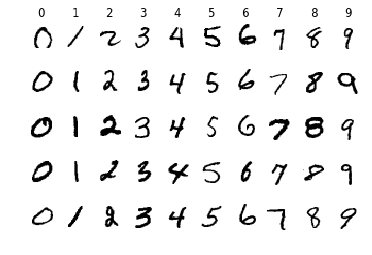

In [3]:
#The images are labeled as 10 classes. Which are enumerated as follows 
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Printing 5 random examples from training images of each class
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_labels==y)
    idxs = np.random.choice(idxs,samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(train_images[idx],cmap=plt.cm.binary)
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

<h4>Printing out the form and shape of the dataset.</h4>

In [4]:
print("Size of the images in the dataset: " + str(train_images.shape[1:3]) + "\n")
print("Number of train images: "+ str(train_images.shape[0]))
print("Number of test images: "+ str(test_images.shape[0]) + "\n")
print("Shape of train image data: "+ str(train_images.shape))
print("Shape of test image data: "+ str(test_images.shape) + "\n")
print("Train labels :" + str(train_labels))
print("Test labels :" + str(test_labels))

Size of the images in the dataset: (28, 28)

Number of train images: 60000
Number of test images: 10000

Shape of train image data: (60000, 28, 28)
Shape of test image data: (10000, 28, 28)

Train labels :[5 0 4 ..., 5 6 8]
Test labels :[7 2 1 ..., 4 5 6]


<h3>Visualization of an Image in the Train dataset </h3>
<h4>This is how an image is saved in the dataset</h4>

In [5]:
index=9 # The image you want to see

print(train_images[index])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

<h4>Visualization of the same image</h4>

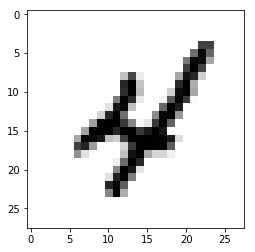

Given Label: 4


In [6]:
plt.imshow(train_images[index],cmap=plt.cm.binary)
plt.show()

print "Given Label: " + str(train_labels[index])

<h3>Network Architecture</h3>

In [7]:
network=models.Sequential()


In [8]:
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))

In [9]:
network.add(layers.Dense(10,activation='softmax'))

In [10]:
network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

<h3>Preparing the image data</h3>

In [11]:
#Reshaping 
train_images=train_images.reshape((60000,28*28))
test_images=test_images.reshape((10000,28*28))
print train_images.shape
print test_images.shape

#Normalising
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

(60000, 784)
(10000, 784)


In [12]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [13]:
h=network.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=7,batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 10s - loss: 0.2630 - acc: 0.9250 - val_loss: 0.1378 - val_acc: 0.9584
Epoch 2/7
60000/60000 [==============================] - 10s - loss: 0.1079 - acc: 0.9681 - val_loss: 0.0966 - val_acc: 0.9700
Epoch 3/7
60000/60000 [==============================] - 10s - loss: 0.0709 - acc: 0.9797 - val_loss: 0.0811 - val_acc: 0.9754
Epoch 4/7
60000/60000 [==============================] - 10s - loss: 0.0504 - acc: 0.9855 - val_loss: 0.0690 - val_acc: 0.9777
Epoch 5/7
60000/60000 [==============================] - 10s - loss: 0.0374 - acc: 0.9886 - val_loss: 0.0683 - val_acc: 0.9786
Epoch 6/7
60000/60000 [==============================] - 10s - loss: 0.0267 - acc: 0.9924 - val_loss: 0.0656 - val_acc: 0.9796
Epoch 7/7
60000/60000 [==============================] - 10s - loss: 0.0201 - acc: 0.9946 - val_loss: 0.0657 - val_acc: 0.9797


In [14]:
#Save the model

# serialize model to JSON
model_json = network.to_json()
with open("mnist_network.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
network.save_weights("mnist_network.h5")
print("Saved model to disk")

Saved model to disk


In [5]:
# load json and create model
json_file = open('../../mnist_network.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("../../mnist_network.h5")
print("Loaded model from disk")

Loaded model from disk


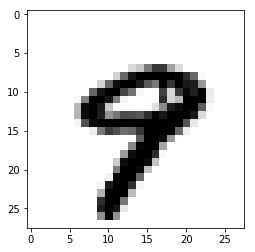

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


array([[  6.59456647e-12,   2.14200334e-13,   7.89395806e-12,
          1.09475434e-06,   2.00727867e-04,   1.03778524e-08,
          3.85230151e-13,   3.52416209e-05,   4.42574128e-06,
          9.99758542e-01]], dtype=float32)

In [79]:
index=9
digit=test_images[index]
plt.imshow(digit.reshape(28,28),cmap=plt.cm.binary)
plt.show()
print test_labels[index]
network.predict(test_images[index:index+1],batch_size=1,verbose=0)

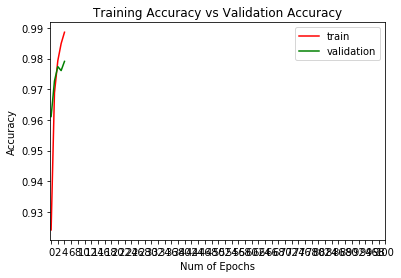

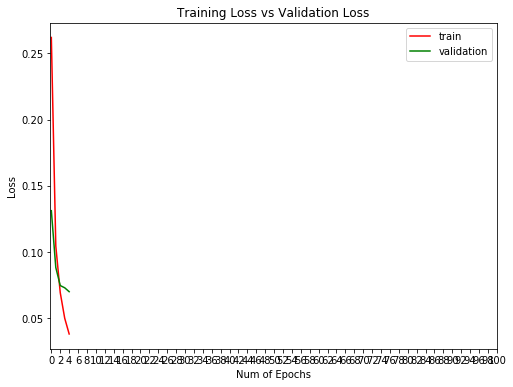

In [80]:
plt.figure(0)
plt.plot(h.history['acc'],'r')
plt.plot(h.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(h.history['loss'],'r')
plt.plot(h.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()